In [130]:
#   https://www.kaggle.com/mrframm/nfl-2020-combine

In [131]:
#   import packages

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandasql
import random
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [132]:
#   load in dataset and see information

data = pd.read_csv('/Users/darren/2021/projects/nflcombineproject/NFL_2020_Combine.csv')

print(data)
print('\n')
print(data.describe(include='all'))
print('\n')
print(data.info())


     Unnamed: 0             Player Pos   Ht   Wt  40yd  Vertical  Bench  \
0             0         Trey Adams  OL  203  318  5.60      24.5    NaN   
1             1     Hakeem Adeniji  OL  193  302  5.17      34.0   26.0   
2             2      McTelvin Agim  DL  190  309  4.98       NaN   27.0   
3             3       Salvon Ahmed  RB  180  197  4.62      34.5    NaN   
4             4      Brandon Aiyuk  WR  183  205  4.50      40.0   11.0   
..          ...                ...  ..  ...  ...   ...       ...    ...   
332         332        D.J. Wonnum  DL  195  258  4.73      34.5   20.0   
333         333  Dom Wood-Anderson  TE  193  261  4.92      35.0    NaN   
334         334     David Woodward  LB  188  230  4.79      33.5   16.0   
335         335        Chase Young  DL  195  264   NaN       NaN    NaN   
336         336      Jabari Zuniga  DL  190  264  4.64      33.0   29.0   

     Broad Jump  3Cone  Shuttle  
0          92.0    NaN      NaN  
1         115.0    NaN      NaN

In [133]:
#   create certain test cases using randomization 
#
#   7 outcomes will be generated for each column 
#
#   sql queries and functions
#
#   1. generate random positions
res = pandasql.sqldf('SELECT Pos FROM data ORDER BY RANDOM() LIMIT 7;', globals())
print('Positions:')
print(res)
print('')

#   2. generate random heights
def heights():
    result = []
    i = 0
    while i < 7:
        h = random.randint(165, 203)
        result.append(h)
        i += 1 
    print('Heights:')
    print(result)

heights()

#   3. generate random weights 
def weights():
    result = []
    i = 0
    while i < 7:
        w = random.randint(170, 364)
        result.append(w)
        i += 1 
    print('Weights:')
    print(result)

weights()

#   4. generate random 40yd times 
def _40yd():
    result = []
    i = 0
    while i < 7:
        _40 = random.randint(round(4.27),round(5.60))
        result.append(_40)
        i += 1
    print('40yd:')
    print(result)

_40yd()

#   5. generate random vertical heights 
def vert():
    result = []
    i = 0
    while i < 7:
        v = random.randint(round(24.5),round(44.5))
        result.append(v)
        i += 1
    print('Vertical:')
    print(result)

vert()

#   6. generate random bench weights 
def bench():
    result = []
    i = 0
    while i < 7:
        b = random.randint(7, 44)
        result.append(b)
        i += 1
    print('Bench:')
    print(result)

bench()

#   7. generate random broad jump lengths
def bjump():
    result = []
    i = 0
    while i < 7:
        brj = random.randint(92, 139)
        result.append(brj)
        i += 1
    print('Broad Jump:')
    print(result)

bjump()

#   8. generate random 3cone times
def _3cone():
    result = []
    i = 0 
    while i < 7:
        _3 = random.randint(round(6.66),round(8.41))
        result.append(_3)
        i += 1
    print('3Cone:')
    print(result)

_3cone()

#   9. generate random shuttle times 
def shuttle():
    result = []
    i = 0
    while i < 7:
        s = random.randint(round(3.97),round(5.27))
        result.append(s)
        i += 1
    print('Shuttle:')
    print(result)

shuttle()


Positions:
  Pos
0  CB
1  TE
2  WR
3   S
4  WR
5  LB
6  CB

Heights:
[199, 185, 184, 165, 198, 203, 199]
Weights:
[177, 223, 227, 359, 190, 212, 321]
40yd:
[6, 4, 4, 6, 5, 4, 5]
Vertical:
[43, 24, 34, 28, 29, 43, 40]
Bench:
[12, 16, 30, 20, 37, 22, 14]
Broad Jump:
[98, 138, 100, 115, 99, 106, 97]
3Cone:
[7, 8, 7, 7, 7, 8, 7]
Shuttle:
[4, 4, 5, 4, 5, 5, 4]


Missing data: 
Unnamed: 0    0
Player        0
Pos           0
Ht            0
Wt            0
40yd          0
Vertical      0
Bench         0
Broad Jump    0
3Cone         0
Shuttle       0
dtype: int64


Percentage of Missing data: 
Unnamed: 0    0.0
Player        0.0
Pos           0.0
Ht            0.0
Wt            0.0
40yd          0.0
Vertical      0.0
Bench         0.0
Broad Jump    0.0
3Cone         0.0
Shuttle       0.0
dtype: float64


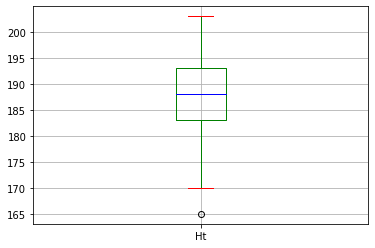

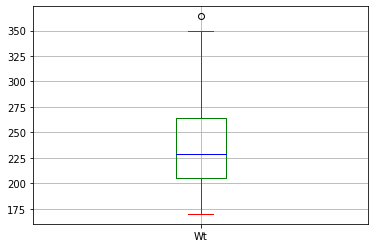

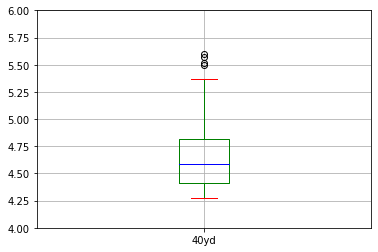

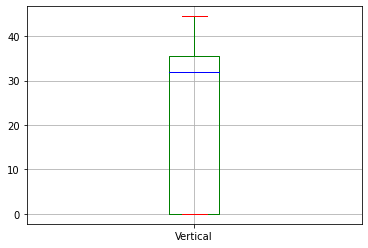

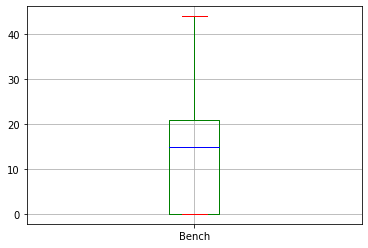

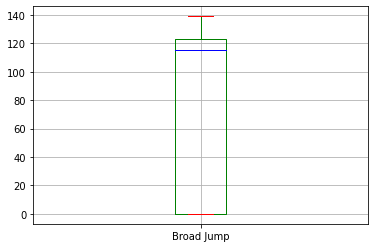

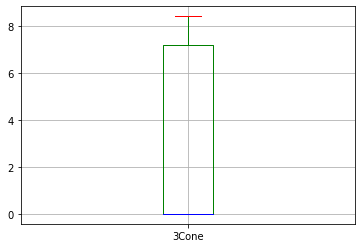

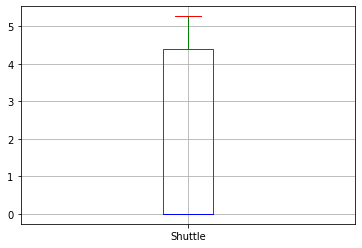

In [197]:
#   data cleaning methods
#
#   check for missing data 

print('Missing data: ')
nummiss = data.isnull().sum()
print(nummiss)

print('\n')

print('Percentage of Missing data: ')
percentmiss = (nummiss/data.shape[0]) * 100
print(percentmiss)

#   boxplots to check for any outliers 

data.boxplot(column = ['Ht'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()
data.boxplot(column = ['Wt'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()
data.boxplot(column = ['40yd'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.ylim(4, 6)
plt.show()
data.boxplot(column = ['Vertical'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()
data.boxplot(column = ['Bench'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()
data.boxplot(column = ['Broad Jump'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()
data.boxplot(column = ['3Cone'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()
data.boxplot(column = ['Shuttle'], color = dict(boxes = 'green', whiskers = 'green', medians = 'blue', caps = 'red'))
plt.show()


In [198]:
#   data cleaning methods
#
#   change NaN values to 0

data['40yd'] = data['40yd'].fillna(0)
data['Vertical'] = data['Vertical'].fillna(0)
data['Bench'] = data['Bench'].fillna(0)
data['Broad Jump'] = data['Broad Jump'].fillna(0)
data['3Cone'] = data['3Cone'].fillna(0)
data['Shuttle'] = data['Shuttle'].fillna(0)

print(data.head(10))

print('\n')

nummiss = data.isnull().sum()
print(nummiss)


   Unnamed: 0            Player Pos   Ht   Wt  40yd  Vertical  Bench  \
0           0        Trey Adams  OL  203  318  5.60      24.5    0.0   
1           1    Hakeem Adeniji  OL  193  302  5.17      34.0   26.0   
2           2     McTelvin Agim  DL  190  309  4.98       0.0   27.0   
3           3      Salvon Ahmed  RB  180  197  4.62      34.5    0.0   
4           4     Brandon Aiyuk  WR  183  205  4.50      40.0   11.0   
5           5         Cam Akers  RB  178  217  4.47      35.5   20.0   
6           6      Bradlee Anae  DL  190  257  4.93      31.0   25.0   
7           7  Tremayne Anchrum  OL  188  314  5.21      24.5   26.0   
8           8      Jet Anderson  RB  178  208  4.61      36.0   19.0   
9           9     Damon Arnette  CB  183  195  4.56       0.0    0.0   

   Broad Jump  3Cone  Shuttle  
0        92.0   0.00     0.00  
1       115.0   0.00     0.00  
2         0.0   0.00     0.00  
3       120.0   0.00     0.00  
4       128.0   0.00     0.00  
5       122.0  

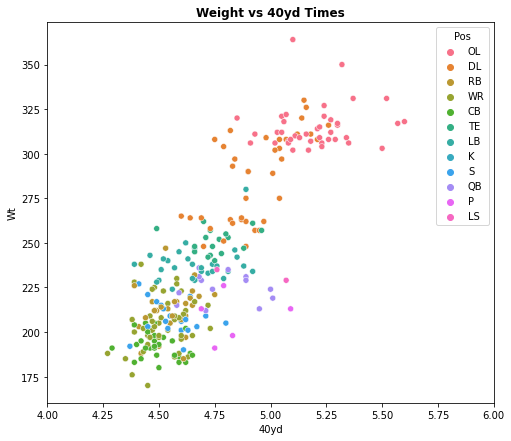

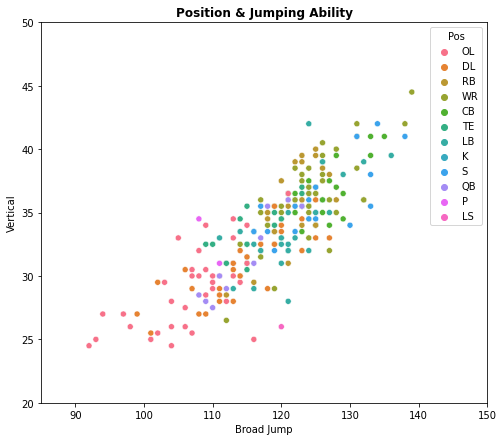

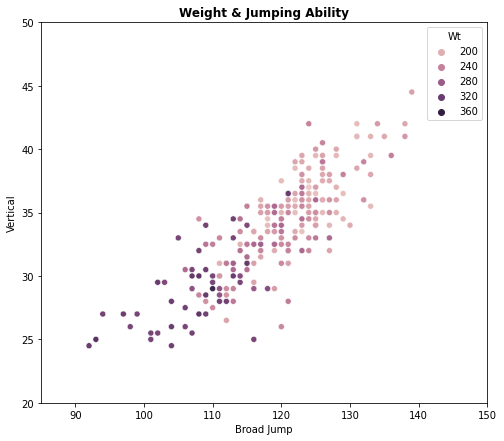

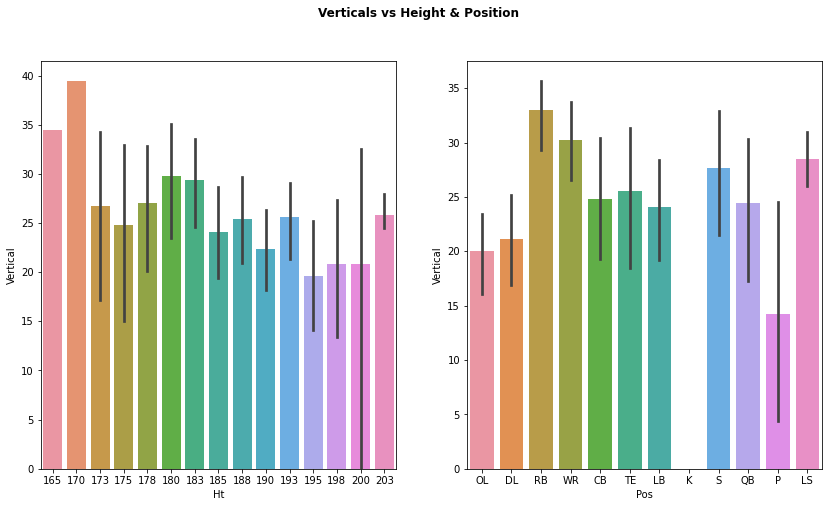

Shuttle & 3Cone Drill Times based on Position


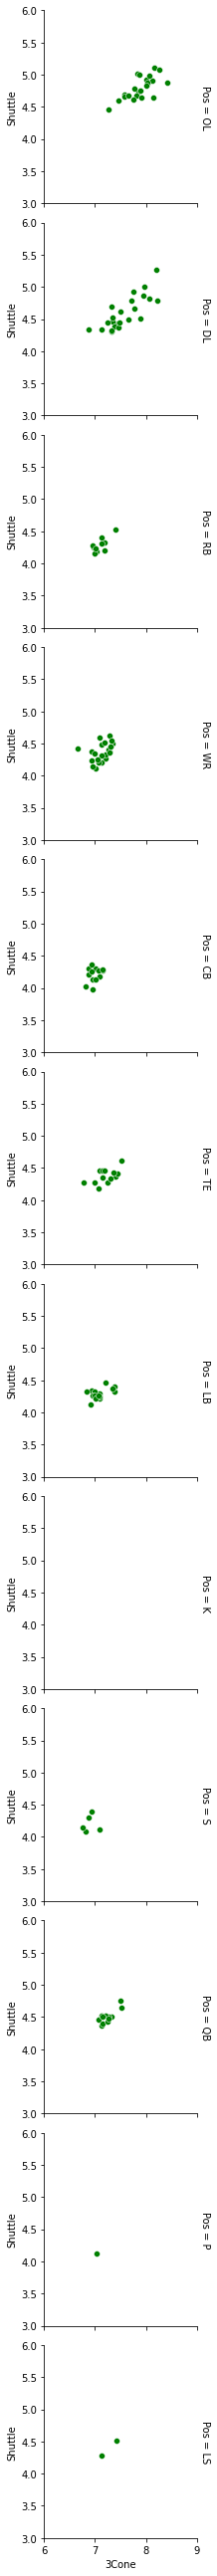

In [199]:
#   some visualizations 
#
#   scatterplot - weight and 40yd times 

plt.subplots(figsize = (8, 7))
sns.scatterplot(x = '40yd', y = 'Wt', hue = 'Pos', data = data).set(xlim = (4, 6))
plt.title('Weight vs 40yd Times', weight = 'bold')
plt.show()

#   scatterplots - jumping abilities 

plt.subplots(figsize = (8, 7))
sns.scatterplot(x = 'Broad Jump', y = 'Vertical', hue = 'Pos', data = data).set(xlim = (85, 150), ylim = (20, 50))
plt.title('Position & Jumping Ability', weight = 'bold')
plt.show()

plt.subplots(figsize = (8, 7))
sns.scatterplot(x = 'Broad Jump', y = 'Vertical', hue = 'Wt', data = data).set(xlim = (85, 150), ylim = (20, 50))
plt.title('Weight & Jumping Ability', weight = 'bold')
plt.show()

fig, ax = plt.subplots(1, 2)
sns.barplot(x = 'Ht', y = 'Vertical', data = data, ax = ax[0])
sns.barplot(x = 'Pos', y = 'Vertical', data = data, ax = ax[1])
fig.set_size_inches(14, 7.5)
fig.suptitle('Verticals vs Height & Position', weight = 'bold')
plt.show()

#   scatterplot - movement drills

g = sns.FacetGrid(data, row = 'Pos', margin_titles = True)
g.map(sns.scatterplot, '3Cone', 'Shuttle', color = 'green').set(ylim = (3,6), xlim = (6,9))
g.fig.subplots_adjust(wspace = 0.1, hspace = 0.1)
print('Shuttle & 3Cone Drill Times based on Position')
plt.show()


(337, 11)


The intercept is:  [3.0626544]
The coefficient is:  [[0.0027737]]


     Actual  Predicted  Difference
0      4.55   3.631263    0.918737
1      4.43   3.622941    0.807059
2      4.93   3.925275    1.004725
3      4.84   3.744984    1.095016
4      0.00   3.786590   -3.786590
..      ...        ...         ...
97     5.06   3.944690    1.115310
98     4.48   3.592431    0.887569
99     4.56   3.683963    0.876037
100    5.21   3.916953    1.293047
101    4.61   3.645131    0.964869

[102 rows x 3 columns]




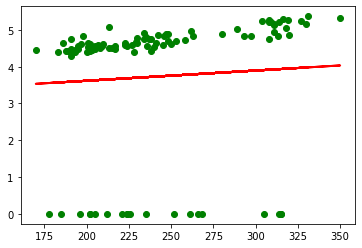



The R-Squared:  0.010880055107137188
The Mean Absolute Error:  1.5383007138641187
The Mean Squared Error:  3.564968127433839


[[3.55359899]
 [3.6811891 ]
 [3.6922839 ]
 [4.05841206]
 [3.58965706]
 [3.65067842]
 [3.95301153]]


In [244]:
#   models (Simple Linear Regression)
#
#   predict 40yd depending on weight

print(data.shape)
print('\n')

x = data['Wt'].values.reshape(-1, 1)
y = data['40yd'].values.reshape(-1, 1)


#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(x_train, y_train)

print('The intercept is: ', reg.intercept_)
print('The coefficient is: ', reg.coef_)
print('\n')

yhat = reg.predict(x_test)

res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat.flatten(), 'Difference': (y_test - yhat).flatten()})

print(res)

print('\n')

plt.scatter(x_test, y_test,  color = 'green')
plt.plot(x_test, yhat, color = 'red', linewidth = 2)
plt.show()

print('\n')

r2 = r2_score(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)

print('The R-Squared: ', r2)
print('The Mean Absolute Error: ', mae)
print('The Mean Squared Error: ', mse)

print('\n')

#   Using the test case randomly generated in the previous function for weights, predict 40yds

testcase = np.array([177, 223, 227, 359, 190, 212, 321]).reshape(-1, 1)

prediction = reg.predict(testcase)
print(prediction)


In [249]:
#   more models (Simple Linear Regression)
#
#   (1) predict Bench based on Weight
#   (2) predict 40yd based on Broad Jump
#   (3) predict 3Cone based on Shuttle 
#
#   Using the test cases randomly generated in the previous functions

#   (1)

x = data['Wt'].values.reshape(-1, 1)
y = data['Bench'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

testcase1 = np.array([231, 348, 336, 173, 227, 223, 347]).reshape(-1, 1)

prediction1 = reg.predict(testcase1)
print('Predicted Bench dependent on Weight: ')
print(prediction1)

print('\n')


#   (2)

x = data['Broad Jump'].values.reshape(-1, 1)
y = data['40yd'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

testcase2 = np.array([92, 139, 138, 107, 132, 107, 125]).reshape(-1, 1)

prediction2 = reg.predict(testcase2)
print('Predicted 40yd dependent on Broad Jump: ')
print(prediction2) 

print('\n')


#   (3) 

x = data['Shuttle'].values.reshape(-1, 1)
y = data['3Cone'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

reg = LinearRegression()
reg.fit(x_train, y_train)

testcase3 = np.array([4, 5, 4, 4, 5, 5, 5]).reshape(-1, 1)

prediction3 = reg.predict(testcase3)
print('Predicted 3Cone dependent on Shuttle: ')
print(prediction3)


Predicted Bench dependent on Weight: 
[[11.37004952]
 [21.58329021]
 [20.53577834]
 [ 6.30707551]
 [11.0208789 ]
 [10.67170828]
 [21.49599755]]


Predicted 40yd dependent on Broad Jump: 
[[3.84550707]
 [5.03398532]
 [5.00869855]
 [4.22480864]
 [4.85697793]
 [4.22480864]
 [4.67997053]]


Predicted 3Cone dependent on Shuttle: 
[[6.02327534]
 [7.42255903]
 [6.02327534]
 [6.02327534]
 [7.42255903]
 [7.42255903]
 [7.42255903]]


In [253]:
#   the model (Multiple Linear Regression)
#
#   predict 40yd times depending on 3Cone and Shuttle times 

print(data.shape)
print('\n')

x = data[['3Cone', 'Shuttle']].values.reshape(-1, 2)
y = data['40yd'].values.reshape(-1, 1)

#   70% data to training set, 30% to test set 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(x_train, y_train)

print('The intercept is: ', reg.intercept_)
print('The coefficients are: ', reg.coef_)
print('\n')

yhat = reg.predict(x_test)

res = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': yhat.flatten(), 'Difference': (y_test - yhat).flatten()})

print(res)
print('\n')

r2 = r2_score(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
mse = mean_squared_error(y_test, yhat)

print('The R-Squared: ', r2)
print('The Mean Absolute Error: ', mae)
print('The Mean Squared Error: ', mse)


(337, 11)


The intercept is:  [2.77852352]
The coefficients are:  [[0.158      0.17359822]]


     Actual  Predicted  Difference
0      4.55   2.778524    1.771476
1      4.43   2.778524    1.651476
2      4.93   4.699852    0.230148
3      4.84   2.778524    2.061476
4      0.00   2.778524   -2.778524
..      ...        ...         ...
97     5.06   4.898207    0.161793
98     4.48   3.925604    0.554396
99     4.56   2.778524    1.781476
100    5.21   4.890327    0.319673
101    4.61   4.601328    0.008672

[102 rows x 3 columns]


The R-Squared:  0.185221517278371
The Mean Absolute Error:  1.3741542800159807
The Mean Squared Error:  2.9366097982546804
